In [157]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import json
import pickle
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

In [129]:
df = pd.read_feather("2022_Lasse_data.feather").reset_index()

In [130]:
svar = json.load(open('raw_data/TV2/alle_svar.json'))
tv2_spg = ["1a", "1b", "2a", "2b", "3a", "3b", "4a", "4b", "5a", "5b", "6a", "6b", "7a", "7b", "8a", "8b", "9a", "9b", "10a", "10b", "11a", "11b", "12a", "12b"]
tv2_svar = {}
tv2_kandidater = {}
for storkreds, kandidater in svar.items():
    for kandidat in kandidater:
        tv2_kandidater[kandidat['id']] = {'navn': kandidat['name'], 'storkreds': kandidat['areaName'], 'parti': kandidat['partyName'], 'alder': kandidat['age']}
        tv2_svar[kandidat['id']] = {x: kandidat['answers'][x]['answer'] for x in tv2_spg if x in kandidat['answers']}
tv2_kandidater = pd.DataFrame(tv2_kandidater).T
tv2_svar = pd.DataFrame(tv2_svar).T
ma = tv2_svar.max()
mi = tv2_svar.min()
tv2_svar = (tv2_svar-mi)/(ma-mi)
q = tv2_svar.copy()
q['parti'] = [tv2_kandidater.loc[x, 'parti'] for x in tv2_svar.index]
q['navn'] = [tv2_kandidater.loc[x, 'navn'] for x in tv2_svar.index]
q['storkreds'] = [tv2_kandidater.loc[x, 'storkreds'] for x in tv2_svar.index]
q['alder'] = [tv2_kandidater.loc[x, 'alder'] for x in tv2_svar.index]
q.parti.replace("Konservative", "Det Konservative Folkeparti", inplace=True)

In [131]:
objects = []
with (open("TakeTheDR/outputs041122.pickle", "rb")) as openfile:
    while True:
        try:
            objects.append(pickle.load(openfile))
        except EOFError:
            break
# Vi beholder kun dem der har svaret.
objects = [x['kandidat'] for x in objects if x['kandidat'][0]]
objects = [x for x in objects if pd.DataFrame(x[0])['Answer'].sum() != 0]
bogstaver = json.load(open('various.json'))['bogstav_leg']
dr_data = []
for i, dd in enumerate(objects):
    person = {'navn': " ".join([dd[1]['Firstname'], dd[1]['LastName']]), 'parti': bogstaver[dd[1]['CurrentPartyCode']]}
    svar = (pd.DataFrame(dd[0])[['QuestionID', 'Answer']].set_index('QuestionID').T-1)/4
    svar.columns = svar.columns.astype('str')
    svar['navn'] = person['navn']
    svar['parti'] = person['parti']
    svar.index = [f'DR{i}']
    dr_data.append(svar)
dr_df = pd.concat(dr_data)
dr_df = dr_df.replace(-0.25, np.nan)

In [132]:
valgte = ["Aaja Chemnitz", "Aki-Matilda Høegh-Dam", "Alex Ahrendtsen", "Alex Vanopslagh", "Alexander Ryle", "Anders Kronborg", "Ane Halsboe-Jørgensen", "Anna Falkenberg", "Anne Paulin", "Anne Valentina Berthelsen", "Annette Lind", "Anni Matthiesen", "Astrid Carøe", "Astrid Krag", "Benny Engelbrecht", "Betina Kastbjerg", "Birgitte Vind", "Bjarne Laustsen", "Bjørn Brandenborg", "Brigitte Klintskov Jerkel", "Camilla Fabricius", "Carl Valentin", "Carsten Bach", "Charlotte Bagge Hansen", "Charlotte Broman Mølbæk", "Charlotte Munch", "Christian Friis Bach", "Christian Rabjerg Madsen", "Christina Sade Olumeko", "Christoffer Aagaard Melson", "Dan Jørgensen", "Dennis Flydtkjær", "Erling Bonnesen", "Fie Hækkerup", "Flemming Møller Mortensen", "Franciska Rosenkilde", "Frederik Vad", "Hans Andersen", "Hans Christian Schmidt", "Hans Kristian Skibby", "Helena Artmann Andresen", "Helene Liliendahl Brydensholt", "Helle Bonnesen", "Henrik Dahl", "Henrik Frandsen", "Henrik Møller", "Ida Auken", "Inger Støjberg", "Jacob Jensen", "Jacob Mark", "Jakob Ellemann-Jensen", "Jakob Engel-Schmidt", "Jan E. Jørgensen", "Jens Henrik Thulesen Dahl", "Jens Joel", "Jens Meilvang", "Jeppe Bruus", "Jeppe Søe", "Jesper Petersen", "Jette Gotliebb", "Jon Stephensen", "Kaare Dybvad Bek", "Karen Ellemann", "Karin Liltorp", "Karina Adsbøl", "Karina Lorentzen Dehnhardt", "Karsten Hønge", "Kasper Roug", "Kasper Sand Kjær", "Katrine Daugaard", "Katrine Robsøe", "Kenneth Fredslund Petersen", "Kim Aas", "Kim Edberg Andersen", "Kirsten Normann Andersen", "Kris Jensen Skriver", "Kristian Bøgsted", "Kristian Klarskov", "Lars Boje Mathiesen", "Lars Christian Lilleholt", "Lars Løkke Rasmussen", "Lars-Christian Brask", "Lea Wermelin", "Leif Lahn", "Linea Søgaard-Lidell", "Lisbeth Bech-Nielsen", "Lise Bech", "Lise Bertelsen", "Lotte Rod", "Louise Brown", "Louise Schack Elholm", "Mads Fuglede", "Magnus Heunicke", "Mai Mercado", "Mai Villadsen", "Malte Larsen", "Maria Durhuus", "Marianne Bigum", "Marie Bjerre", "Marlene Harpsøe", "Martin Lidegaard", "Matilde Powers", "Mattias Tesfaye", "Mette Abildgaard", "Mette Frederiksen", "Mette Gjerskov", "Mette Kierkgaard", "Mette Reissmann", "Mette Thiesen", "Michael Aastrup Jensen", "Mike Villa Fonseca", "Mikkel Bjørn Sørensen", "Mogens Jensen", "Mona Juul", "Monika Rubin", "Morten Bødskov", "Morten Dahlin", "Morten Messerschmidt", "Nanna W. Gotfredsen", "Nick Zimmermann", "Nicolai Wammen", "Niels Flemming Hansen", "Ole Birk Olesen", "Peder Hvelplund", "Pelle Dragsted", "Per Husted", "Per Larsen", "Pernille Rosenkrantz-Theil", "Pernille Vermund", "Peter Have", "Peter Hummelgaard", "Peter Juel-Jensen", "Peter Kofod Poulsen", "Peter Seier Christensen", "Peter Skaarup", "Pia Kjærsgaard", "Pia Olsen Dyhr", "Preben Bang Henriksen", "Rasmus Horn Langhoff", "Rasmus Jarlov", "Rasmus Lund-Nielsen", "Rasmus Prehn", "Rasmus Stoklund", "Rosa Eriksen", "Rosa Lund", "Samira Nawa Amini", "Sandra Elisabeth Skalvig", "Sara Emil Baaring", "Sascha Faxe", "Signe Munk", "Sigurd Agersnap", "Simon Kollerup", "Sjúrður Skaale", "Sofie Carsten Nielsen", "Sofie Lippert", "Sophie Løhde", "Steffen Larsen", "Steffen W. Frølund", "Susie Jessen", "Sólbjørg Jakobsen", "Søren Egge Rasmussen", "Søren Espersen", "Søren Gade", "Søren Pape Poulsen", "Søren Søndergaard", "Theresa Berg Andersen", "Theresa Scavenius", "Thomas Danielsen", "Thomas Jensen", "Thomas Monberg", "Thomas Skriver Jensen", "Tobias Grotkjær Elmstrøm", "Torsten Gejl", "Torsten Schack Pedersen", "Trine Bramsen", "Trine Mach", "Troels Lund Poulsen", "Victoria Velásquez", "Zenia Stampe"]
navne_trans = {"Fie Hækkerup": "Fie Thorsted Hækkerup",
"Kim Edberg Andersen": "Kim Edberg",
"Mike Villa Fonseca": "Mike Fonseca",
"Samira Nawa Amini": "Samira Nawa",
"Trine Mach": "Trine Pertou Mach",
"Jens Henrik Thulesen Dahl": "Jens Henrik W. Thulesen Dahl",
"Jette Gotliebb": "Jette Gottlieb",
"Mikkel Bjørn Sørensen": "Mikkel Bjørn",
"Peter Kofod Poulsen": "Peter Kofod",
"Steffen W. Frølund": "Steffen Frølund",
"Ida Auken": "Ida Margrete Meier Auken",
"Jon Stephensen": "Jon Læssøe Stephensen",
"Magnus Heunicke": "Magnus Johannes Heunicke",}
valgte_t = list(map(lambda x: navne_trans[x] if x in navne_trans else x, valgte))

In [133]:
svaret = {}
for navn in valgte_t:
    svar = {'dr':0, 'tv2':0, 'begge':0}
    if dr_df.navn.str.contains(navn).any():
        svar['dr'] = 1
    if q.navn.str.contains(navn).any():
        svar['tv2'] = 1
    if df.navn.str.contains(navn).any():
        svar['begge'] = 1
    svaret[navn] = svar
svaret = pd.DataFrame(svaret)

<AxesSubplot: >

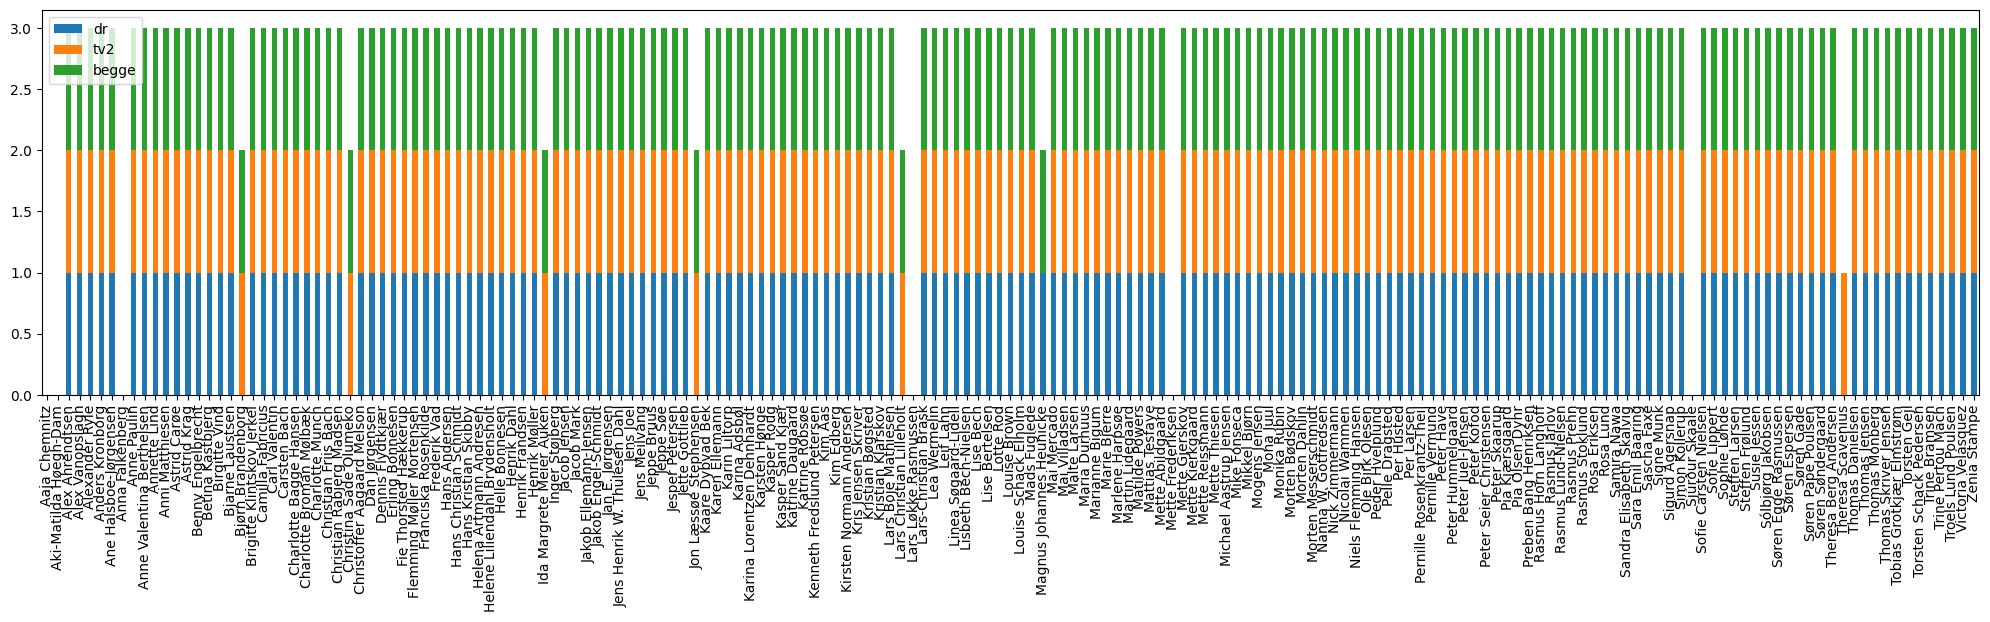

In [134]:
svaret.T.plot(kind='bar', stacked=True, figsize=(25,5), rot=90)

In [135]:
svaret.sum()[svaret.sum() == 0].index

Index(['Aaja Chemnitz', 'Aki-Matilda Høegh-Dam', 'Anna Falkenberg',
       'Lars Løkke Rasmussen', 'Mette Frederiksen', 'Sjúrður Skaale'],
      dtype='object')

In [136]:
svaret.T[svaret.T.begge == 0]

,dr,tv2,begge
Aaja Chemnitz,0,0,0
Aki-Matilda Høegh-Dam,0,0,0
Anna Falkenberg,0,0,0
Lars Løkke Rasmussen,0,0,0
Mette Frederiksen,0,0,0
Sjúrður Skaale,0,0,0
Theresa Scavenius,0,1,0


In [138]:
df_v = df[df.navn.isin(valgte_t)]
df_v

,index,530,531,533,534,535,537,538,540,541,...,9a,9b,10a,10b,11a,11b,12a,12b,storkreds,alder
1,1,1.00,1.00,0.25,0.00,0.25,0.00,0.75,0.00,1.00,...,0.00,0.50,0.25,1.00,0.75,0.00,0.50,0.50,Fyns Storkreds,64
17,17,1.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,...,0.00,0.50,0.00,1.00,0.75,0.75,0.50,0.00,Østjyllands Storkreds,58
25,25,1.00,1.00,0.00,0.25,0.25,0.25,0.75,0.00,1.00,...,0.00,0.50,0.25,1.00,0.50,0.00,0.25,0.75,Østjyllands Storkreds,30
29,29,0.25,0.25,1.00,0.25,1.00,0.25,0.00,0.75,0.00,...,0.25,0.25,0.50,1.00,0.00,1.00,0.50,0.50,Østjyllands Storkreds,53
33,33,0.25,0.25,0.75,0.00,1.00,0.75,0.00,0.75,0.00,...,0.25,0.50,0.75,0.75,0.00,1.00,0.75,0.25,Østjyllands Storkreds,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
865,865,0.75,0.75,1.00,0.00,1.00,0.25,0.75,0.25,0.25,...,0.50,0.25,0.75,1.00,0.75,0.00,0.75,0.50,Københavns Omegns Storkreds,41
866,866,0.75,0.75,0.75,0.00,1.00,0.25,0.75,0.25,0.25,...,0.25,0.50,0.25,1.00,0.75,0.00,0.75,0.75,Københavns Omegns Storkreds,33
868,868,0.75,0.00,0.00,0.00,0.75,0.00,0.25,0.00,0.00,...,0.25,0.50,0.25,1.00,1.00,0.00,0.50,0.50,Københavns Omegns Storkreds,45
869,869,0.75,0.75,0.75,0.00,1.00,0.25,0.75,0.25,0.25,...,0.25,0.50,0.25,1.00,1.00,0.00,0.50,0.75,Københavns Omegns Storkreds,52


In [147]:
color_dict = pd.read_json("various.json").set_index('bogstav_leg')['farver'].to_dict()
dk_spg = ['530', '531', '533', '534', '535', '537', '538', '540', '541', '543','544', '545', '546', '547', '548', '550', '551', '552', '553', '555',
       '556', '557', '559', '561', '563', '1a', '1b', '2a','2b', '3a', '3b', '4a', '4b', '5a', '5b', '6a', '6b', '7a', '7b', '8a',
       '8b', '9a', '9b', '10a', '10b', '11a', '11b', '12a', '12b']


In [164]:
X = df_v[dk_spg]
kmean = KMeans(n_clusters=2)
y = df_v['parti']
lda = LinearDiscriminantAnalysis(n_components=2).fit(X, y)

In [165]:
q = pd.concat([
    df_v,
    pd.DataFrame(lda.transform(df_v[dk_spg]), columns=["X", "y"]).set_index(df_v.index),
    pd.DataFrame(kmean.fit_predict(X), columns=["clust"]).set_index(df_v.index)
],axis=1)

In [166]:
q['bogstav'] = q.parti.map(pd.read_json("various.json").reset_index().set_index('bogstav_leg')['index'])

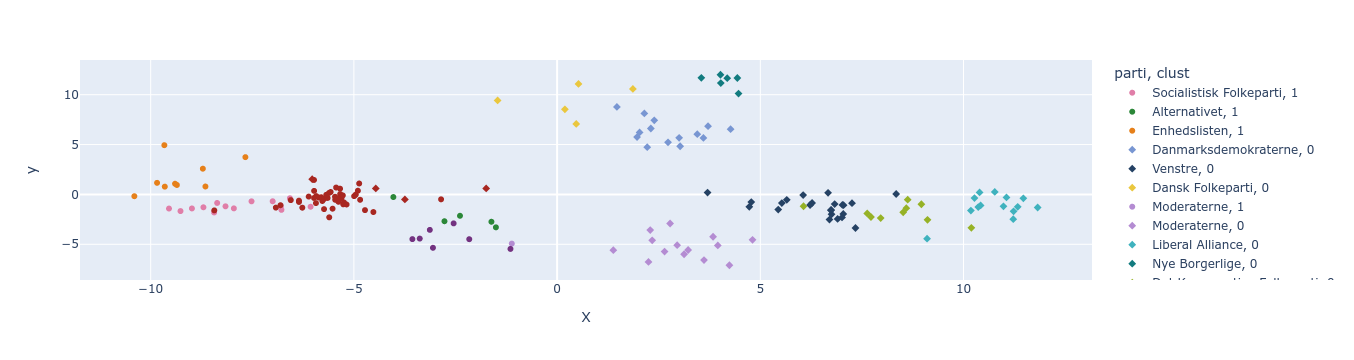

In [167]:
px.scatter(q, x='X',y='y', color='parti', symbol='clust', color_discrete_map=color_dict, hover_data=['navn', 'storkreds', 'alder', 'clust'], custom_data=['index'])

In [180]:
a = kmean.fit_transform(X)

In [196]:
b = q[['navn', 'parti']].copy()
b['clust'] = a[:,0]
print(b.sort_values(by='clust').iloc[:85].to_string())

                              navn                    parti     clust
116                      Jens Joel        Socialdemokratiet  0.926398
711                 Mette Gjerskov        Socialdemokratiet  0.927241
305                   Rasmus Prehn        Socialdemokratiet  0.998637
226       Ida Margrete Meier Auken        Socialdemokratiet  1.138294
482                    Anne Paulin        Socialdemokratiet  1.153972
593                Jesper Petersen        Socialdemokratiet  1.184045
222              Peter Hummelgaard        Socialdemokratiet  1.197169
674                     Jacob Mark  Socialistisk Folkeparti  1.243267
110                 Thomas Monberg        Socialdemokratiet  1.312950
705           Rasmus Horn Langhoff        Socialdemokratiet  1.325976
703                    Kasper Roug        Socialdemokratiet  1.348759
591                  Birgitte Vind        Socialdemokratiet  1.357995
460                     Signe Munk  Socialistisk Folkeparti  1.362016
282          Theresa

In [198]:
print(b.sort_values(by='clust').iloc[85:].to_string())

                             navn                        parti     clust
702                  Frederik Vad            Socialdemokratiet  2.583680
55                     Peter Have                  Moderaterne  2.639027
600             Benny Engelbrecht            Socialdemokratiet  2.671977
403             Bjørn Brandenborg            Socialdemokratiet  2.672854
728                  Sophie Løhde                      Venstre  2.695557
431              Thomas Danielsen                      Venstre  2.763392
356               Erling Bonnesen                      Venstre  2.765653
57       Tobias Grotkjær Elmstrøm                  Moderaterne  2.775804
808                Karen Ellemann                      Venstre  2.776648
743           Jakob Engel-Schmidt                  Moderaterne  2.783954
649                  Mike Fonseca                  Moderaterne  2.805201
317             Peter Juel-Jensen                      Venstre  2.813266
428                    Søren Gade                  